In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest
from sklearn.neural_network import MLPClassifier # Import MLP (Multi-Layer Perceptron)
from sklearn.linear_model import LogisticRegression # Import Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Import Decision Trees

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#basic metrics
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score

In [3]:
data = pd.read_csv("C:\\Users\\Divya\\Desktop\\Diabetes_Prediction_with_ML\\Data\\BloodGlucoseDataset.csv")
data.head()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9.0,79.0,73.0,118.0,98.0,98.300707,99.0,0.0,0.0,N
1,9.0,80.0,73.0,119.0,102.0,98.300707,94.0,1.0,0.0,N
2,9.0,70.0,76.0,110.0,81.0,98.300707,98.0,1.0,0.0,N
3,9.0,70.0,78.0,115.0,96.0,98.300707,96.0,1.0,0.0,N
4,66.0,100.0,96.0,144.0,92.0,97.807052,98.0,0.0,0.0,N


In [4]:
#Basic cleaning up of dataframe 

#Renaming columns
data = data.rename(columns = {'Blood Glucose Level(BGL)' : 'BGL', 'Sweating  (Y/N)': 'Sweating', 'Shivering (Y/N)' : 'Shivering', 'Diabetic/NonDiabetic (D/N)' : 'target'})

#Checking for null values
print("Null values : ", data.isna().sum())
data = data.dropna()

#Changing target column values
t = {'N':0, 'D':1}
data.target = [t[item] for item in data.target]

data.head()

Null values :  Age                         10
BGL                         10
Diastolic Blood Pressure    10
Systolic Blood Pressure     10
Heart Rate                  10
Body Temperature            10
SPO2                        10
Sweating                    10
Shivering                   10
target                      10
dtype: int64


,Age,BGL,Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating,Shivering,target
0,9.0,79.0,73.0,118.0,98.0,98.300707,99.0,0.0,0.0,0
1,9.0,80.0,73.0,119.0,102.0,98.300707,94.0,1.0,0.0,0
2,9.0,70.0,76.0,110.0,81.0,98.300707,98.0,1.0,0.0,0
3,9.0,70.0,78.0,115.0,96.0,98.300707,96.0,1.0,0.0,0
4,66.0,100.0,96.0,144.0,92.0,97.807052,98.0,0.0,0.0,0


<Axes: ylabel='proportion'>

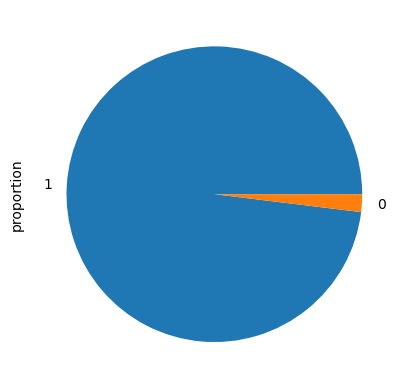

In [5]:
data['target'].value_counts(normalize = True).plot.pie()

In [6]:
data.describe()

,Age,BGL,Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating,Shivering,target
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,30.988862,95.710177,77.173493,118.187165,91.524191,97.356146,97.382403,0.121692,0.145560,0.980671
std,25.585606,42.999698,7.241511,7.700363,10.409780,0.813555,0.848689,0.326940,0.352674,0.137684
min,9.000000,50.000000,60.000000,95.000000,78.000000,96.000132,93.000000,0.000000,0.000000,0.000000
25%,9.000000,68.000000,71.000000,113.000000,84.000000,96.674465,97.000000,0.000000,0.000000,1.000000
50%,14.000000,83.000000,76.000000,119.000000,89.000000,97.326523,98.000000,0.000000,0.000000,1.000000
75%,55.000000,108.000000,83.000000,124.000000,95.000000,97.949904,98.000000,0.000000,0.000000,1.000000
max,77.000000,250.000000,98.000000,145.000000,130.000000,98.999792,99.000000,1.000000,1.000000,1.000000


<Axes: >

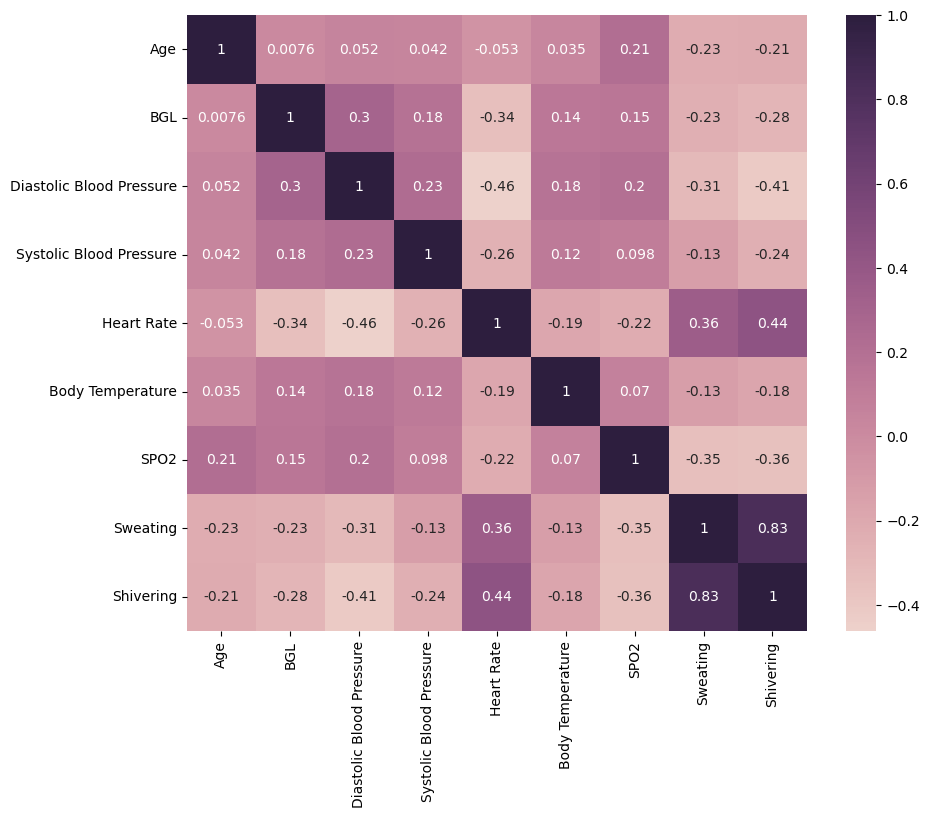

In [7]:
#Understanding the relationship between the data features with a correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(data.iloc[:, :-1].corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

<Axes: xlabel='Shivering', ylabel='Sweating'>

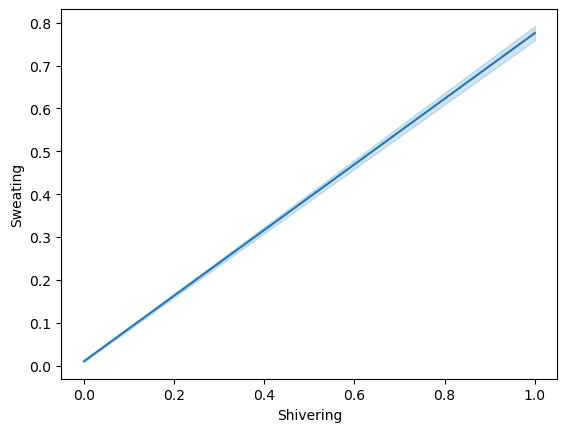

In [8]:
sns.lineplot(data=data, x="Shivering", y="Sweating")
#these two varibales have a linear relationship

<Axes: xlabel='Heart Rate', ylabel='Sweating'>

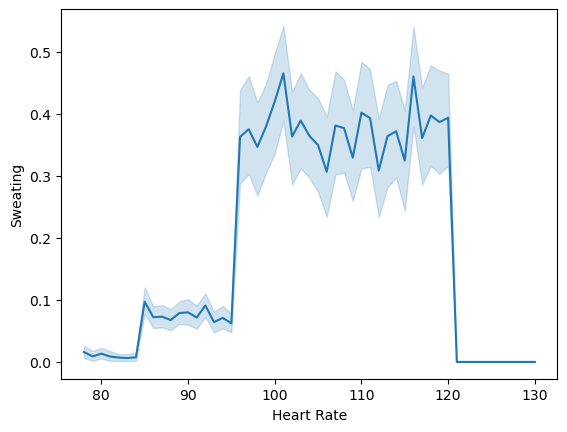

In [9]:
sns.lineplot(data=data, x="Heart Rate", y="Sweating")

<Axes: xlabel='Heart Rate', ylabel='Shivering'>

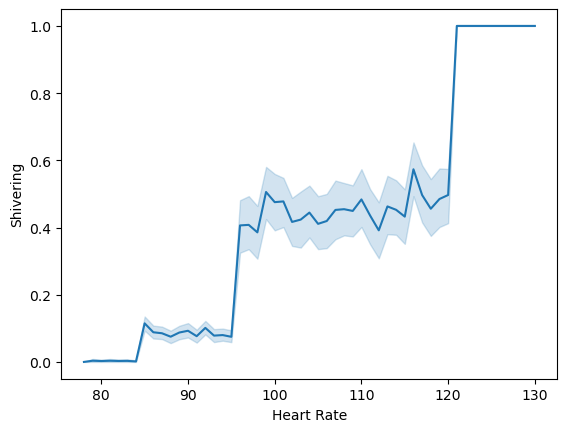

In [10]:
sns.lineplot(data=data, x="Heart Rate", y="Shivering")

Comparing Classifier Models and analysing the weights given to each feature

The Logistic Regression model isn't converging and it might be due to the highly correlated features -  'Sweating' and 'Shivering'. So we'll drop one of the features and see what happens to the models performances.

In [11]:
y = data['target']
X = data.drop(['target', 'Sweating'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
rf_classifier = RandomForestClassifier().fit(X_train, y_train)
y_rf = rf_classifier.predict(X_test)

In [13]:
ann_classifier = MLPClassifier().fit(X_train, y_train)
y_ann = ann_classifier.predict(X_test)

In [14]:
dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
y_dt = dt_classifier.predict(X_test)

In [19]:
lr_classifier = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_lr = lr_classifier.predict(X_test)

In addition to removing one of the correlated data peices, I've changed the algorithm that it uses to 'liblinear' as we are dealing with a much smaller dataset.

Evaluating Model Performances

In [20]:
#check the accuracy score
print(accuracy_score(y_test, y_rf))
print(accuracy_score(y_test, y_ann))
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_dt))

0.9970536240424278
0.9923394225103123
0.9827145943822432
0.9948929483402082


In [21]:
#check the MCC
print(matthews_corrcoef(y_test, y_rf))
print(matthews_corrcoef(y_test, y_ann))
print(matthews_corrcoef(y_test, y_lr))
print(matthews_corrcoef(y_test, y_dt))

0.9162884333345208
0.7648070823638725
0.2690888243596424
0.8620296027915152


In [25]:
#check the F1 score (Giving the minority class '0' the positive label)
print(f1_score(y_test, y_rf, pos_label=0))
print(f1_score(y_test, y_ann, pos_label=0))
print(f1_score(y_test, y_lr, pos_label=0))
print(f1_score(y_test, y_dt, pos_label=0))

0.9142857142857143
0.7450980392156863
0.1372549019607843
0.8645833333333334


How can I extract the features or weights corresponding to the classes to understan which variables had more of an influence on the model's prediction?